In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

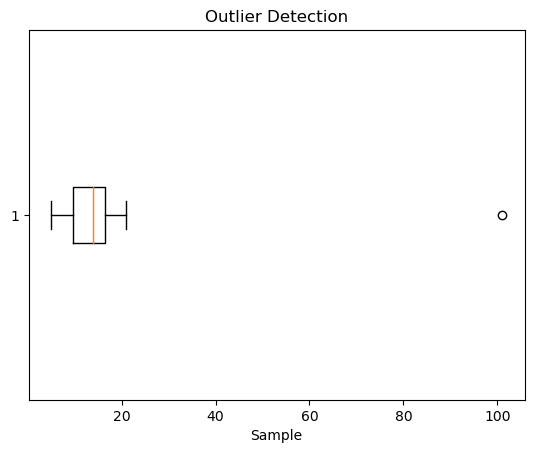

In [3]:
sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
plt.boxplot(sample, vert = False)
plt.title("Outlier Detection")
plt.xlabel('Sample')
plt.show()

## Method 2

In [5]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if(i<lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_iqr(sample)
print(sample_outliers)
            
            
            

[101]


## Method 3

In [6]:
outliers =[]
def detect_outliers_zscore(data):
    thres=3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score)> thres):
            outliers.append(i)

    return outliers
sample_outliers = detect_outliers_zscore(sample)
print(sample_outliers)
    
    
    
    

[101]


## Detecting outliers using Tukeyâ€s

In [7]:
from scipy import stats


In [10]:
data = np.array([1, 20, 20, 20, 21, 100])
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
IQR = q3-q1
lwr_fence = q1-(1.5*IQR)
upr_fence = q3+(1.5*IQR)
outliers = np.where((data<lwr_fence) | (data > upr_fence))
print(data[outliers])


[  1 100]


## Treatment of Outliers

### T1 Trimming outliers / remove outliers

In [11]:
sample = np.array([15, 101, 18, 7, 13, 16, 11, 21, 5 ,15, 10, 9])
i = [101]
a= np.delete(sample, np.where(sample==i))
print(a)
print(len(sample), len(a))


[15 18  7 13 16 11 21  5 15 10  9]
12 11


### T2 Quantile based flooring and Capping

In [12]:
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print('New array :', b)



New array : [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


### T3 Mean / Median imputation

In [13]:
median = np.median(sample)
c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print('New array:', c)

Sample:  [ 15 101  18   7  13  16  11  21   5  15  10   9]
New array: [15 14 18  7 13 16 11 21  5 15 10  9]


{'whiskers': [<matplotlib.lines.Line2D at 0x1eaa6022f50>,
 'caps': [<matplotlib.lines.Line2D at 0x1eaa6028ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eaa5fa7fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eaa602a150>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eaa2b3ab50>],
 'means': []}

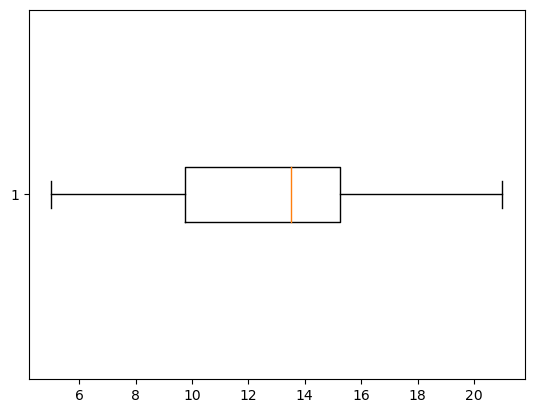

In [14]:
plt.boxplot(c, vert=False)


In [16]:
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                  'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                  'assists':[5, 7,7 ,8, 5, 7, 6,9,9,5],
                  'rebounds':[11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})
df

,rating,points,assists,rebounds
0,90,25,5,11
1,85,20,7,8
2,82,14,7,10
3,88,16,8,6
4,94,27,5,6
5,90,20,7,9
6,76,12,6,6
7,75,15,9,10
8,87,14,9,10
9,86,19,5,7


In [17]:
from statsmodels.formula.api import ols

In [19]:
model = ols('rating ~ points + assists + rebounds', data =df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Thu, 18 Apr 2024   Prob (F-statistic):             0.0995
Time:                        10:45:05   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4716     14.588      4.282      0.0

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
from statsmodels.stats.stattools import durbin_watson

In [21]:
durbin_watson(model.resid)

2.3920546872335327